In [1]:
pip install sktime[all_extras]

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.0.1 requires cmdstanpy==0.9.68, but you have cmdstanpy 0.9.5 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
pip install pywin32-ctypes

In [3]:
pip install pystan==2.19.1.1

In [4]:
pip install prophet

  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [5]:
pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
pip install --upgrade mxnet~=1.7

  Using cached mxnet-1.9.0-py3-none-manylinux2014_x86_64.whl (47.3 MB)
  Attempting uninstall: mxnet
    Found existing installation: mxnet 1.7.0.post2
    Uninstalling mxnet-1.7.0.post2:
      Successfully uninstalled mxnet-1.7.0.post2


In [7]:
pip install mxnet==1.7.0.post2

  Using cached mxnet-1.7.0.post2-py2.py3-none-manylinux2014_x86_64.whl (54.7 MB)
  Attempting uninstall: mxnet
    Found existing installation: mxnet 1.9.0
    Uninstalling mxnet-1.9.0:
      Successfully uninstalled mxnet-1.9.0


In [8]:
pip install gluonts

## IMPORTAMOS LIBRERIAS: 

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.model_selection import ForecastingGridSearchCV, SlidingWindowSplitter
from sktime.performance_metrics.forecasting import mean_absolute_error
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sktime.transformations.series.boxcox import LogTransformer
from sktime.utils.plotting import plot_correlations
from sktime.forecasting.ets import AutoETS
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.exponential_smoothing.ets import ETSModel as _ETSModel
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score
from gluonts.evaluation.backtest import make_evaluation_predictions

In [11]:
# estas son las librerias necesarias para el AMAZON DEEP AR:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import mxnet as mx
import numpy as np

## IMPORTAMOS LOS DATOS: 

In [12]:
# Leemos únicamente la pestaña de excel de datos horarios:

df_horarios = pd.read_excel("DemandaEnergia.xlsx", "Hourly Data")
df_horarios

,Region,UTC time,Local date,Local hour,Local time,Time zone,D
0,CAL,2015-07-01 08:00:00,2015-07-01,1,2015-07-01 01:00:00,Pacific,38210
1,CAL,2015-07-01 09:00:00,2015-07-01,2,2015-07-01 02:00:00,Pacific,35171
2,CAL,2015-07-01 10:00:00,2015-07-01,3,2015-07-01 03:00:00,Pacific,33243
3,CAL,2015-07-01 11:00:00,2015-07-01,4,2015-07-01 04:00:00,Pacific,31955
4,CAL,2015-07-01 12:00:00,2015-07-01,5,2015-07-01 05:00:00,Pacific,31199
...,...,...,...,...,...,...,...
56267,CAL,2021-11-30 19:00:00,2021-11-30,11,2021-11-30 11:00:00,Pacific,29068
56268,CAL,2021-11-30 20:00:00,2021-11-30,12,2021-11-30 12:00:00,Pacific,28769
56269,CAL,2021-11-30 21:00:00,2021-11-30,13,2021-11-30 13:00:00,Pacific,29180
56270,CAL,2021-11-30 22:00:00,2021-11-30,14,2021-11-30 14:00:00,Pacific,29719


In [13]:
# Escogemos únicamente las columnas "Local Time" y "D":
df_horarios = df_horarios[["Local time", "D"]]

# Definimos Local time como indice de la serie temporal: 
df_horarios.set_index("Local time", inplace=True)
df_horarios = df_horarios.resample('H').mean()
df_horarios = df_horarios.dropna()
df_horarios.sort_index(inplace=True)
df_horarios

,D
Local time,
2015-07-01 01:00:00,38210.0
2015-07-01 02:00:00,35171.0
2015-07-01 03:00:00,33243.0
2015-07-01 04:00:00,31955.0
2015-07-01 05:00:00,31199.0
...,...
2021-11-30 11:00:00,29068.0
2021-11-30 12:00:00,28769.0
2021-11-30 13:00:00,29180.0


## ANALISIS DE LA SERIE TEMPORAL 

### Evolución de la serie temporal: 

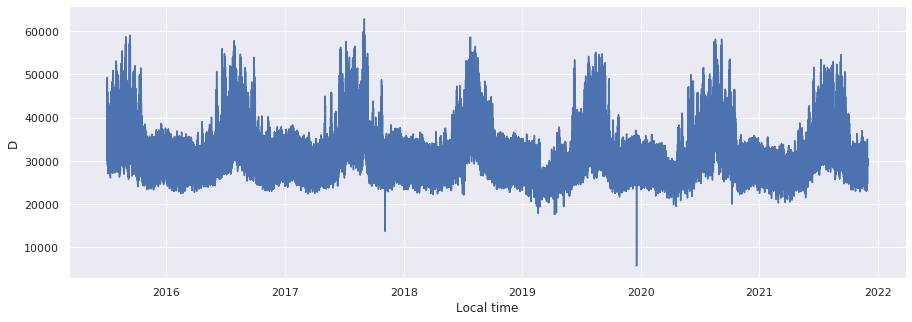

In [14]:
# Dibujamos la serie temporal en escala normal...
# Los datos aparecen en forma % porque hay picos de demanda por encima del millon. Por lo que los datos estan expresados en millones...
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.lineplot(y="D", x=df_horarios.index, data=df_horarios)
sns.despine()

### Componentes estacionales: 

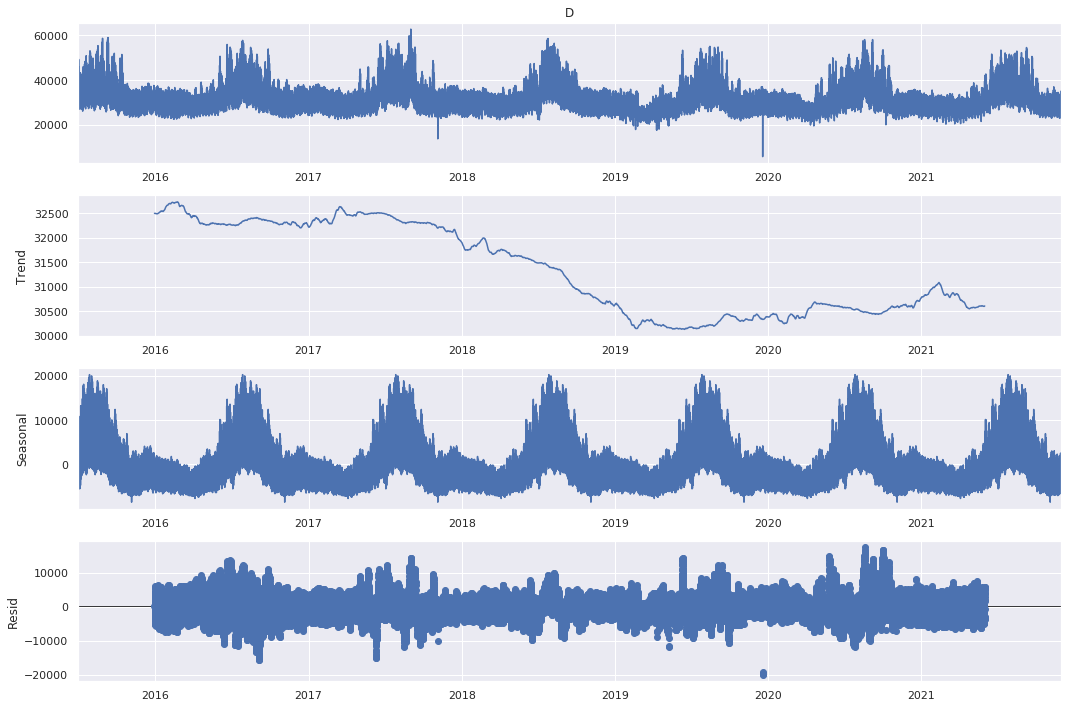

In [15]:
# Analizamos el componente estacional:
# Vemos como la serie temporal tiene una estacionalidad situandose su pico en los meses de verano y su minimo en los meses de invierno,
# la tendencia de la serie temporal es descendiente, sin embargo es apenas perceptible. 
sns.set(rc={'figure.figsize':(15,10)})
seasonal_decompose(df_horarios['D'].astype('int64'), period=8760).plot() #8760 porque son las horas anuales medias. (24*365)
plt.show()


Para realizar el análisis un poco mas exhaustivode la serie temporal, vamos a crear un nuevo dataset que incluya las columnas en años meses y dias de los consumos:

In [16]:
df_horarios_analisis = df_horarios
df_horarios_analisis["hour"] = df_horarios_analisis.index.hour
df_horarios_analisis["year"] = df_horarios_analisis.index.year
df_horarios_analisis["month"] = df_horarios_analisis.index.month
df_horarios_analisis["qtr"] = df_horarios_analisis.index.quarter
df_horarios_analisis["week"] = df_horarios_analisis.index.week
df_horarios_analisis["Media Diaria"] = df_horarios_analisis.D.rolling(24).agg(np.mean)
df_horarios_analisis["Media Semanal"] = df_horarios_analisis.D.rolling(168).agg(np.mean)
df_horarios_analisis["Media Mensual"] = df_horarios_analisis.D.rolling(720).agg(np.mean)
df_horarios_analisis["Media Anual"] = df_horarios_analisis.D.rolling(8760).agg(np.mean)
df_horarios_analisis["day"] = df_horarios_analisis.index.day
df_horarios_analisis

,D,hour,year,month,qtr,week,Media Diaria,Media Semanal,Media Mensual,Media Anual,day
Local time,,,,,,,,,,,
2015-07-01 01:00:00,38210.0,1,2015,7,3,27,NaN,NaN,NaN,NaN,1
2015-07-01 02:00:00,35171.0,2,2015,7,3,27,NaN,NaN,NaN,NaN,1
2015-07-01 03:00:00,33243.0,3,2015,7,3,27,NaN,NaN,NaN,NaN,1
2015-07-01 04:00:00,31955.0,4,2015,7,3,27,NaN,NaN,NaN,NaN,1
2015-07-01 05:00:00,31199.0,5,2015,7,3,27,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30 11:00:00,29068.0,11,2021,11,4,48,29494.166667,27290.726190,28188.217361,30608.136815,30
2021-11-30 12:00:00,28769.0,12,2021,11,4,48,29485.041667,27286.440476,28193.252083,30608.142066,30
2021-11-30 13:00:00,29180.0,13,2021,11,4,48,29478.541667,27285.065476,28199.407639,30608.259989,30


### Análisis del trend:

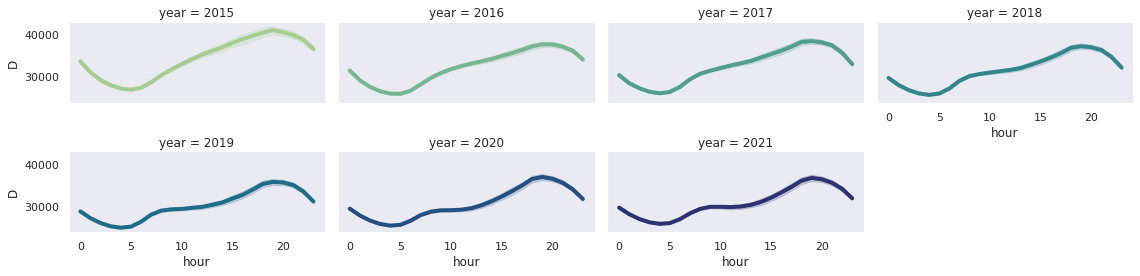

In [17]:
# Vemos la evolución de la demanda electrica diaria por años. Nos ha parecido bastante interesante mostrar como evoluciona el consumo a lo 
# largo de los años y sus comparativas. Los dibujos son identicos al analisis diario por lo que no introducimos ningun concepto nuevo. 

sns.set_theme(style="dark")
g = sns.relplot(
    data=df_horarios_analisis,
    x="hour", y="D", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=10,
    col_wrap=4, height=2, aspect=2, legend=False,
)

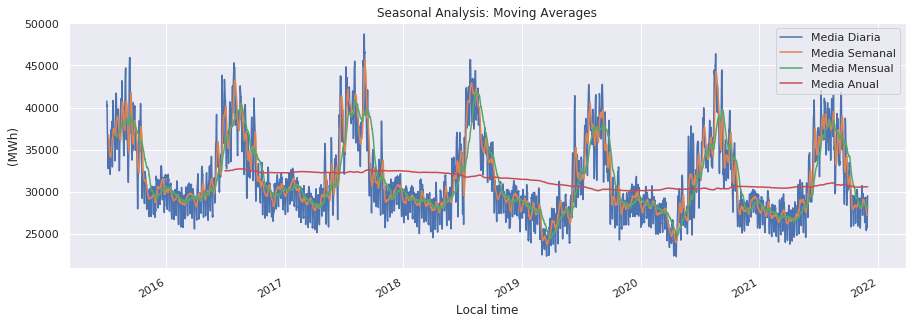

In [18]:
sns.set(rc={'figure.figsize':(15,5)})
df_horarios_analisis[["Media Diaria", "Media Semanal", "Media Mensual", "Media Anual"]].plot(title="Seasonal Analysis: Moving Averages")
plt.ylabel("(MWh)")
plt.show()

### Análisis de las distribuciones de datos: 

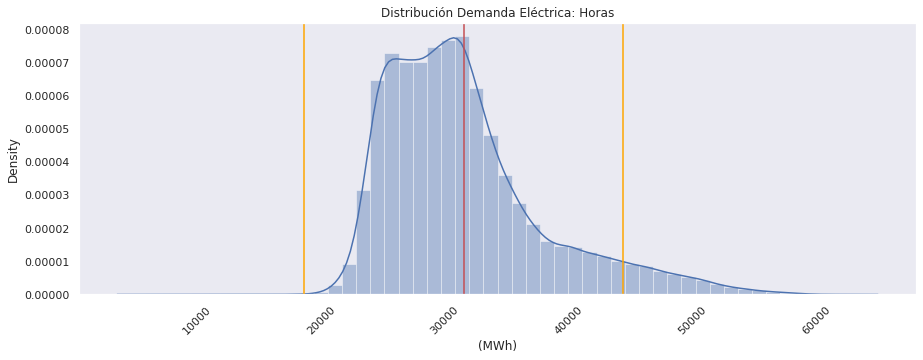

In [19]:
mean = np.mean(df_horarios_analisis.D)
std = np.std(df_horarios_analisis.D)
sns.distplot(df_horarios_analisis.D)
plt.title("Distribución Demanda Eléctrica: Horas")
plt.xticks(rotation=45)
plt.xlabel("(MWh)")
plt.tick_params(grid_alpha=0)
plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.show()

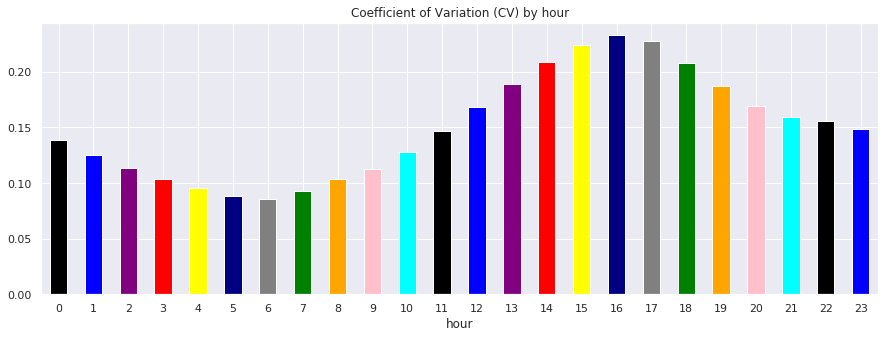

In [20]:
# el pico por horas se produce a las 16 mientras que las horas con menos consumición logicamente son las de madrugada.
df_horarios_analisis.groupby("hour")["D"].std().divide(df_horarios_analisis.groupby("hour")["D"].mean()).plot(kind="bar", color={"navy", "purple","orange",
                                                                                                                                 "pink","blue", "green",
                                                                                                                                 "cyan", "red", "yellow",
                                                                                                                                 "black", "grey"})
plt.title("Coefficient of Variation (CV) by hour")
plt.xticks(rotation=0)
plt.show()

### Análisis Outliers:

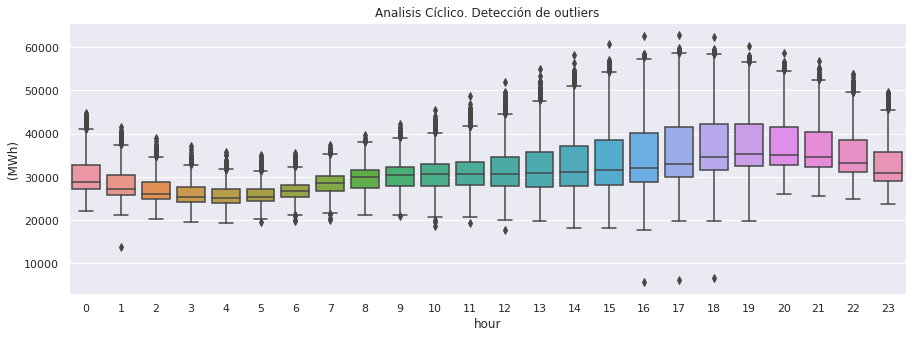

In [21]:
# Podemos determinar que las horas en las que el consumo de demanda es mas volátil son de 16 a 18 de la tarde tambien son las que mas consumo
# tienen.
sns.boxplot(data=df_horarios_analisis, x="hour", y="D")
plt.title("Analisis Cíclico. Detección de outliers")
plt.ylabel("(MWh)")
plt.show()

## SEPARACIÓN ENTRE TRAIN Y TEST

Eleguimos una proporción de 7 dias por 24 horas diarias. Lo que nos hace coger una muestra de 168 horas de test.

In [22]:
df_horarios = df_horarios[["D"]]

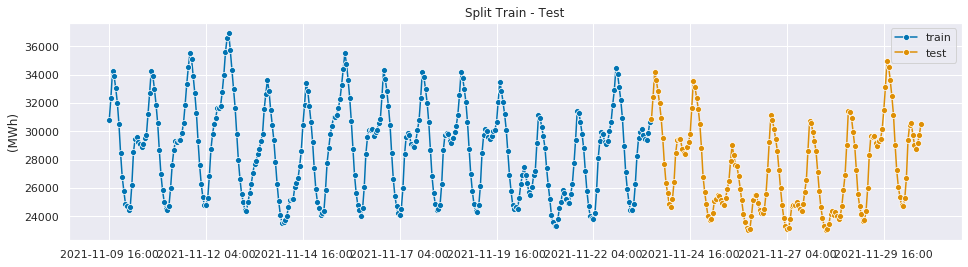

In [23]:
train, test = temporal_train_test_split(y = df_horarios['D'].astype('float64').to_period('h'), test_size=168)

# Dibujamos la serie dividida entre train y test, en este caso, acortamos train para poder ver mejor la evolución del train:
plot_series(train[-336:], test, labels=["train", "test"])
plt.title("Split Train - Test")
plt.ylabel("(MWh)")
plt.show()

## SEPARACIÓN TRAIN y TEST REDUCIDO

Para algunos de los modelos que vamos a probar a continuación hemos decidido decidir la muestra de train que le vamos a dar. EN este sentido vamos a escoger unicamente los 1056 ultimos valores. (El ultimo mes y medio).

In [24]:
df_horarios_reduced = df_horarios.tail(1056)

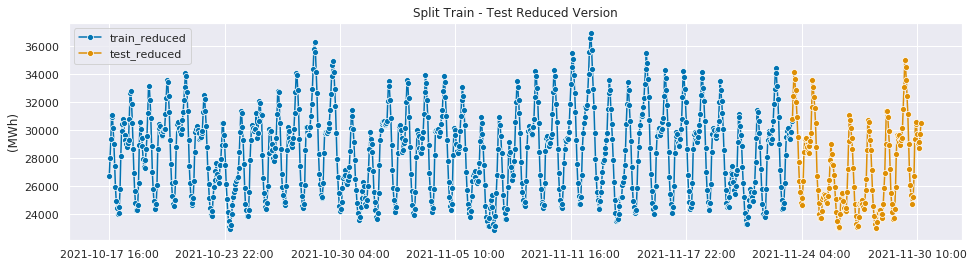

In [25]:
train_reduced, test_reduced = temporal_train_test_split(y = df_horarios_reduced['D'].astype('float64').to_period('h'), test_size=168)

# Dibujamos la serie dividida entre train y test, en este caso, acortamos train para poder ver mejor la evolución del train:
plot_series(train_reduced, test_reduced, labels=["train_reduced", "test_reduced"])
plt.title("Split Train - Test Reduced Version")
plt.ylabel("(MWh)")
plt.show()

## TRANSFORMACIÓN DE DATOS EN ESCALA LOGARITMICA

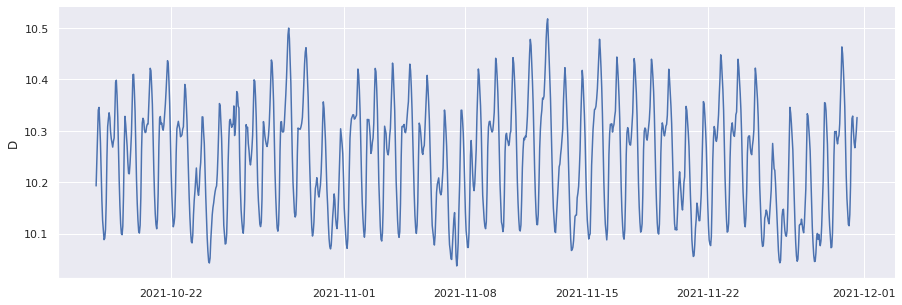

In [26]:
# Transformamos la serie en escala logaritmica: 
transformer = LogTransformer()
df_horarios_log = transformer.fit_transform(df_horarios_reduced)

# Dibujamos la serie temporal en escala logaritmica...
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.lineplot(y="D", x=df_horarios_log.index, data=df_horarios_log)
sns.despine()

### Separación entre train y test

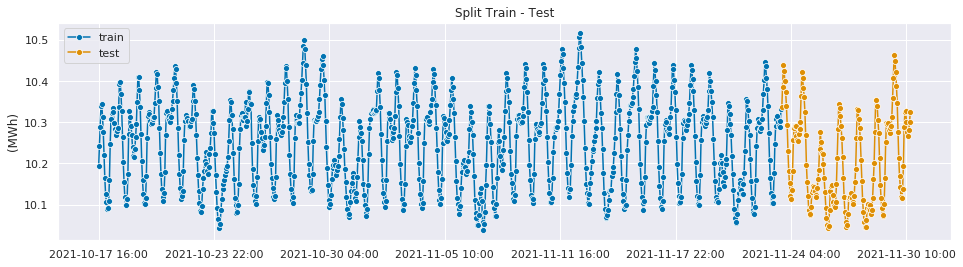

In [27]:
train_log, test_log = temporal_train_test_split(y = df_horarios_log['D'].astype('float64').to_period('h'), test_size=168)

# Dibujamos la serie dividida entre train y test, en este caso, acortamos train para poder ver mejor la evolución del train:

plot_series(train_log, test_log, labels=["train", "test"])
plt.title("Split Train - Test")
plt.ylabel("(MWh)")
plt.show()

### Análisis de correlacciones

(<Figure size 864x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f773ec7d4d0>,
       dtype=object))

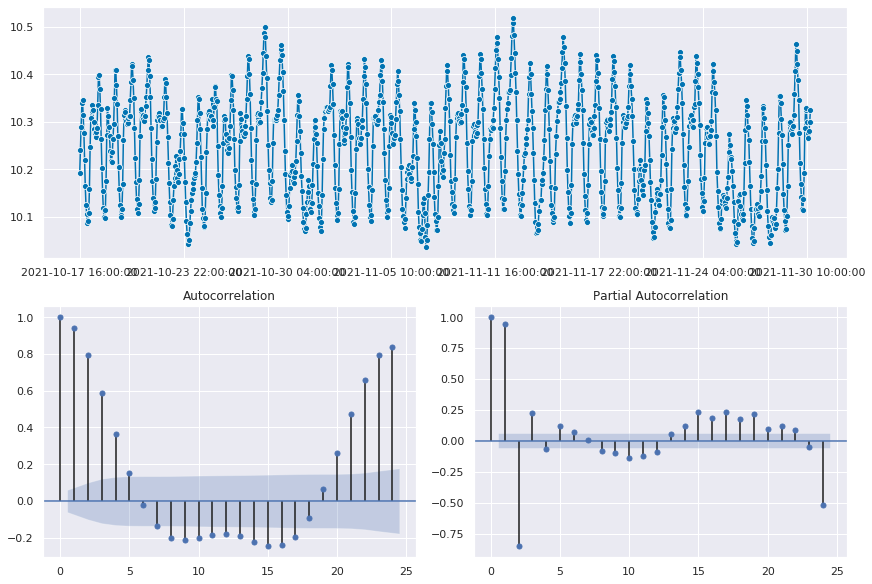

In [28]:
plot_correlations(df_horarios_log)

## MÉTODOS SENCILLOS DE PREDICCIÓN:

### Método Naive de la Media

MOSTRAMOS LOS ERRORES DE LOS MODELOS (comparativa): 
                  R2_score   MAPE       RMSE        MAE
Modelo                                                 
Naive Bayes Mean   -0.1539  0.102  3230.7762  2802.8257
---
GRÁFICO PREDICCIONES: 


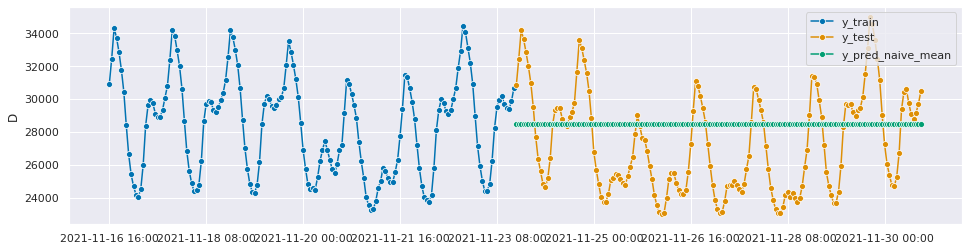

In [29]:
# Definimos el horizonte temporal: 
fh = ForecastingHorizon(np.arange(len(test_reduced)) + 1)

# Definimos el predictor: 
naive_mean = NaiveForecaster(strategy="mean") #ya que tenemos los datos en diario

#Ajustamos el modelo:
naive_mean.fit(train_reduced)

#Predecimos:
pred_naive_mean = naive_mean.predict(fh)

#Dibujamos el modelo: 
plot_series(train_reduced[-168:], test_reduced, pred_naive_mean, labels=["y_train", "y_test", "y_pred_naive_mean"])

#Mostramos los errores del modelo de predicción: 
rmse = MeanSquaredError(square_root=True)
Errores = pd.DataFrame({
    "Modelo": ["Naive Bayes Mean"],
    "R2_score": [round(r2_score(test_reduced,pred_naive_mean),4)],
    "MAPE": [round(mean_absolute_percentage_error(test_reduced,pred_naive_mean),4)],
    "RMSE": [round(rmse(test_reduced,pred_naive_mean),4)],
    "MAE": [round(mean_absolute_error(test_reduced,pred_naive_mean),4)]
})

Errores = Errores.set_index("Modelo")

print("MOSTRAMOS LOS ERRORES DE LOS MODELOS (comparativa): ")
print(Errores)
print("---")
print("GRÁFICO PREDICCIONES: ")

El primero modelo naive con media no logra adaptar sus predicciones a los datos reales. Obtenemos un r2 negativo. Este ratio compara el fit del modelo con el de una linea horizontal (hipotesis nula), al ser este negativo no podemos rechazar la hippotesis nula y por lo tanto determinamos que nuestro modelo se adapta peor que una linea horizontal.



### Método Naive Estacional:

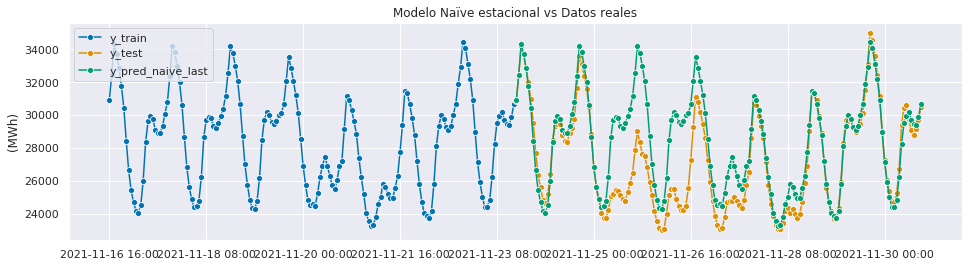

MOSTRAMOS LOS ERRORES DE LOS MODELOS (comparativa): 
                        R2_score    MAPE       RMSE        MAE
Modelo                                                        
Naive Bayes Mean         -0.1539  0.1020  3230.7762  2802.8257
Naive Bayes Estacional    0.5504  0.0473  2016.6727  1302.6905
---
GRÁFICO PREDICCIONES: 


In [30]:
# Definimos el horizonte temporal: 
fh = ForecastingHorizon(np.arange(len(test_reduced)) + 1)

# Definimos el predictor: 
naive_last = NaiveForecaster(strategy="last", sp=168) #ya que tenemos los datos en diario

#Ajustamos el modelo:
naive_last.fit(train_reduced)

#Predecimos:
pred_naive_last= naive_last.predict(fh)

#Dibujamos el modelo: 
plot_series(train_reduced[-168:],test_reduced, pred_naive_last, labels=["y_train", "y_test","y_pred_naive_last"])
plt.title("Modelo Naïve estacional vs Datos reales")
plt.ylabel("(MWh)")
plt.show()

#Mostramos los errores del modelo de predicción: 
rmse = MeanSquaredError(square_root=True)

Errores.loc["Naive Bayes Estacional"] = [round(r2_score(test_reduced,pred_naive_last),4),
                                   round(mean_absolute_percentage_error(test_reduced,pred_naive_last),4),
                                   round(rmse(test_reduced,pred_naive_last),4),
                                   round(mean_absolute_error(test_reduced,pred_naive_last),4)]

print("MOSTRAMOS LOS ERRORES DE LOS MODELOS (comparativa): ")
print(Errores)
print("---")
print("GRÁFICO PREDICCIONES: ")

El modelo Naive Bayes estacional sin embargo, se adapta a la perfección a la serie temporal. Esto es debido principalmente a dos factores. El primero, es la reducción de muestra a un mes y medio. Venimos comentando ya tanto en este notebook como en el diario que la tendencia a lo largo de 6 años es minima. Si reducimos esta muestra a 1 mes y media la existencia de tendencia es NULA. 
Por otro lado, el modelo lo que hace es replicar los 168 valores anteriores, que, sin la mencionada tendencia le hace mucho mas facil generar una predicción acertada. 

El R2 score es del 55% una metrica buenisima que, en primera instancia nos dice que el nuestro modelo se ajusta a la serie en 55 puntos porcentuales mejor que si aplicaramos una linea horizontal(50/50). 

Obtenemos un MAPE DE 4% que traducido a termino monetarios implica un error de 1.300€ Quiza con un RMSE mas abultado debido a los dias 3 y 4 de predicción. 

Si le tenemos que poner un pero al modelo es justo el periodo 3 y 4 cuyo descenso de demanda no logra predecir. DEhecho podemos ver una predicción bastante por encima de los valores reales. 

## MODELO ETS

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                 ETS Results                                  
Dep. Variable:                      D   No. Observations:                  888
Model:                      ETS(MAdM)   Log Likelihood               -6516.286
Date:                Thu, 20 Jan 2022   AIC                          13094.572
Time:                        20:11:06   BIC                          13243.030
Sample:                    10-17-2021   HQIC                         13151.321
                         - 11-23-2021   Scale                            0.000
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.092     10.827      0.000       0.819       1.181
smoothing_trend         0.6058      0.181      3.349      0.001       0.251       0.960
smoothing_season

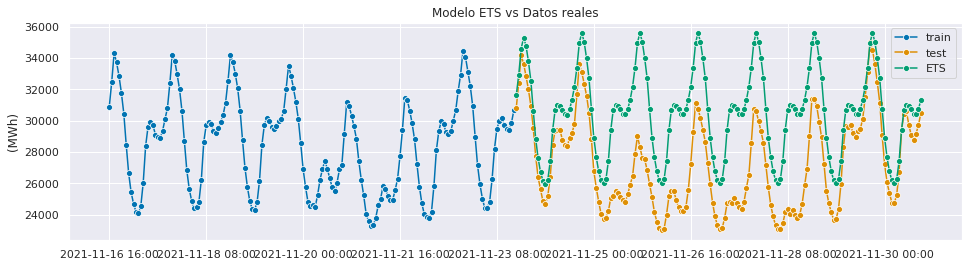

MOSTRAMOS LOS ERRORES DE LOS MODELOS (comparativa): 
                        R2_score    MAPE       RMSE        MAE
Modelo                                                        
Naive Bayes Mean         -0.1539  0.1020  3230.7762  2802.8257
Naive Bayes Estacional    0.5504  0.0473  2016.6727  1302.6905
ETS                      -0.5914  0.1145  3794.0754  3264.0555
---
GRÁFICO PREDICCIONES: 


In [31]:
# Definimos el horizonte temporal: 
fh = ForecastingHorizon(np.arange(len(test_reduced)) + 1, is_relative=True)

# Definimos el predictor:
ets_model = AutoETS(auto=True, sp=24, njobs=-1)

# Ajustamos el modelo:
ets_model.fit(train_reduced)

# Mostramos el modelo obtenido: 
print(ets_model.summary())
print("---")
# Predecimos:
pred_ets_model = ets_model.predict(fh)

# Dibujamos el modelo: 
plot_series(train_reduced[-168:], test_reduced, pred_ets_model, labels=["train", "test","ETS"])
plt.title("Modelo ETS vs Datos reales")
plt.ylabel("(MWh)")
plt.show()

# Mostramos los errores del modelo de predicción: 
rmse = MeanSquaredError(square_root=True)

Errores.loc["ETS"] = [round(r2_score(test_reduced,pred_ets_model),4),
                      round(mean_absolute_percentage_error(test_reduced,pred_ets_model),4),
                      round(rmse(test_reduced,pred_ets_model),4),
                      round(mean_absolute_error(test_reduced,pred_ets_model),4)]

print("MOSTRAMOS LOS ERRORES DE LOS MODELOS (comparativa): ")
print(Errores)
print("---")
print("GRÁFICO PREDICCIONES: ")

Al realizar el modelo ETS tenemos un problema y es que no le podemos introducir el sp deseado ya que el tiempo de computación es muy elevado. Es por ello que, con la estacionalidad diaria de 24 horas no obtenemos buenos resultados. 

Como se puede ver en la gráfica, la predicción es una replica exacta del ultimo dia. Lo que no tiene en cuenta el modelo son los periodos del dia 3 y 4 donde la demanda se reduce considerablemente. DE ahi el fallo mas abultado de este modelo y que nuestro r2 score salga negativo no pudiendo rechazar la hipotesis nula y por lo tanto, no generando predicciones idoneas. 



## MODELO PROPHET

In [32]:
df_horarios_prophet = df_horarios.reset_index()
df_horarios_prophet = df_horarios_prophet.rename(columns={"Local time":"ds","D":"y"})

prophet_train = df_horarios_prophet.iloc[:56096]
prophet_test = df_horarios_prophet.iloc[56096:]

MOSTRAMOS LOS ERRORES DE LOS MODELOS (comparativa): 
                        R2_score    MAPE       RMSE        MAE
Modelo                                                        
Naive Bayes Mean         -0.1539  0.1020  3230.7762  2802.8257
Naive Bayes Estacional    0.5504  0.0473  2016.6727  1302.6905
ETS                      -0.5914  0.1145  3794.0754  3264.0555
PROPHET                   0.3739  0.0675  2379.7740  1863.3345
---
GRAFICO DEL MODELO: 


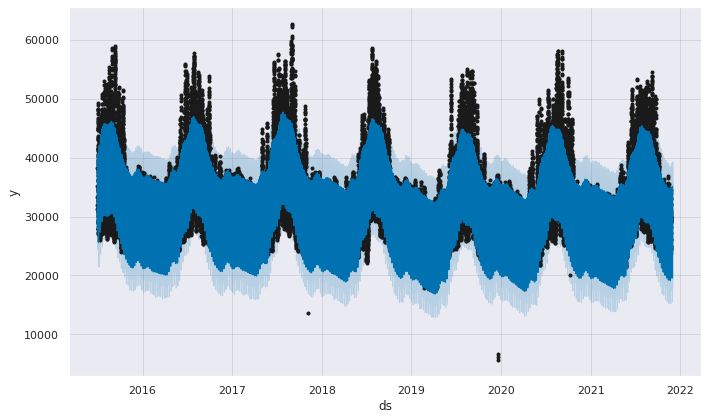

---
DESCOMPOSICIÓN DEL MODELO: 


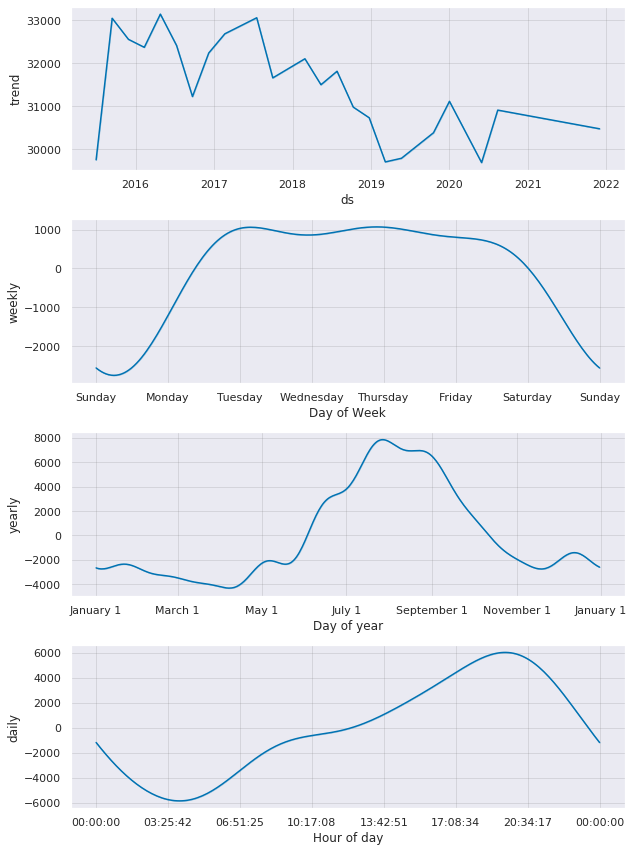

---
GRÁFICO PREDICCIONES vs REALIDAD: 


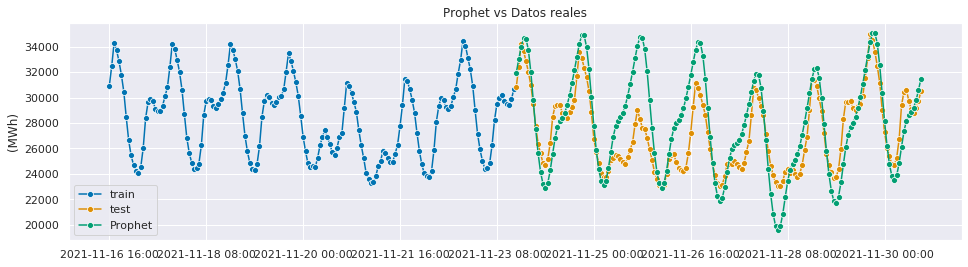

In [33]:
# Definimos el horizonte temporal: 
fh = (len(prophet_test))

# Definimos el predictor:
prophet_model = Prophet()

# Ajustamos el modelo:
prophet_model.fit(prophet_train)

# Predecimos: 
fh_prophet = prophet_model.make_future_dataframe(periods=fh, freq="h")
pred_prophet_model = prophet_model.predict(fh_prophet)

# Mostramos los errores del modelo de predicción:
rmse = MeanSquaredError(square_root=True)

Errores.loc["PROPHET"] = [round(r2_score(test,pred_prophet_model["yhat"].tail(168)),4),
                          round(mean_absolute_percentage_error(test,pred_prophet_model["yhat"].tail(168)),4),
                          round(rmse(test,pred_prophet_model["yhat"].tail(168)),4),
                          round(mean_absolute_error(test,pred_prophet_model["yhat"].tail(168)),4)]


print("MOSTRAMOS LOS ERRORES DE LOS MODELOS (comparativa): ")
print(Errores)
print("---")
print("GRAFICO DEL MODELO: ")

# Dibujamos el grafico del predict:
fig1 = prophet_model.plot(pred_prophet_model)
plt.show()
print("---")
print("DESCOMPOSICIÓN DEL MODELO: ")
fig2 = prophet_model.plot_components(pred_prophet_model)
plt.show()

print("---")
print("GRÁFICO PREDICCIONES vs REALIDAD: ")

# Dibujamos el modelo: 
pred_prophet_model.set_index("ds", inplace=True)
pred_prophet_model.index = pred_prophet_model.index.to_period("h")
plot_series(train[-168:], test, pred_prophet_model["yhat"].tail(168), labels=["train", "test","Prophet"])
plt.title("Prophet vs Datos reales")
plt.ylabel("(MWh)")
plt.show()

Primero mencionar que, con este modelo, hemos introducido todos los datos de la serie temporal para realizar el training, (salvando los del test claro esta). 

Este modelo genera predicciones que se logran adaptar mejor a la serie temporal. Podemos ver que su r2 es positivo, por lo que su implementación sera mejor que la de una linea horizontal. 

En cuanto a los errores, volvemos a destacar, sobre todo, los dias 3 y 4, que es donde mas les cuesta predecir a todos los modelos realizados hasta ahora. Sin embargo, vemos, en las curvas de predicción como si que hay un ligero descenso y una curva que puede adaptarse en mayor medida a la forma peculiar de estos dias. 

Sin embargo, este modelo no es tan bueno como nuestro naive bayes, por lo que de momento no lo usaremos para la predicción. 

## AMAZON DEEP AR

INFO:gluonts.trainer:Start model training
INFO:gluonts.trainer:Epoch[0] Learning rate is 0.001
100%|██████████| 11/11 [00:08<00:00,  1.25it/s, epoch=1/5, avg_epoch_loss=11.2]
INFO:gluonts.trainer:Epoch[0] Elapsed time 8.821 seconds
INFO:gluonts.trainer:Epoch[0] Evaluation metric 'epoch_loss'=11.175978
INFO:gluonts.trainer:Epoch[1] Learning rate is 0.001
100%|██████████| 11/11 [00:06<00:00,  1.61it/s, epoch=2/5, avg_epoch_loss=9.7]
INFO:gluonts.trainer:Epoch[1] Elapsed time 6.836 seconds
INFO:gluonts.trainer:Epoch[1] Evaluation metric 'epoch_loss'=9.702656
INFO:gluonts.trainer:Epoch[2] Learning rate is 0.001
100%|██████████| 11/11 [00:06<00:00,  1.60it/s, epoch=3/5, avg_epoch_loss=9.38]
INFO:gluonts.trainer:Epoch[2] Elapsed time 6.889 seconds
INFO:gluonts.trainer:Epoch[2] Evaluation metric 'epoch_loss'=9.376506
INFO:gluonts.trainer:Epoch[3] Learning rate is 0.001
100%|██████████| 11/11 [00:06<00:00,  1.60it/s, epoch=4/5, avg_epoch_loss=9.24]
INFO:gluonts.trainer:Epoch[3] Elapsed time 6.

MOSTRAMOS LOS ERRORES DE LOS MODELOS (comparativa): 
                        R2_score    MAPE       RMSE        MAE
Modelo                                                        
Naive Bayes Mean         -0.1539  0.1020  3230.7762  2802.8257
Naive Bayes Estacional    0.5504  0.0473  2016.6727  1302.6905
ETS                      -0.5914  0.1145  3794.0754  3264.0555
PROPHET                   0.3739  0.0675  2379.7740  1863.3345
AMAZON DEEP AR            0.7868  0.0382  1388.5549  1036.7205
---
GRAFICO DE PREDICCIONES vs REALIDAD: 


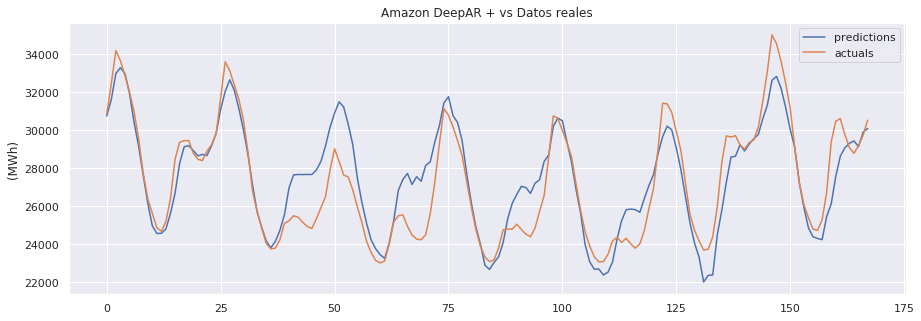

In [34]:
# Ajustamos el formato de los datos para que puedan ser usados por gluonts:
from gluonts.dataset.common import ListDataset

df_horarios_amazon = df_horarios.reset_index()
df_horarios_amazon = df_horarios_amazon.rename(columns={"Local time":"date","D":"y"})

start = pd.Timestamp("01-07-2015 01:00:00", freq="H")

train_ds = ListDataset([{'target': df_horarios_amazon.loc[:56265,'y'], 'start': start}], freq='H')
test_ds = ListDataset([{'target': df_horarios_amazon['y'], 'start': start}],freq='H')

# Establecemos una semilla para que, al realizar la red neuronal obtengamos siempre el mismo resultado: 
np.random.seed(168)
mx.random.seed(168)

# Establecemos el modelo: 
estimator = DeepAREstimator(prediction_length=168,
                            context_length=24,
                            freq='H',
                            trainer=Trainer(epochs=5,
                                            learning_rate=1e-3,
                                            num_batches_per_epoch=11), 
                            num_layers = 3,
                            num_cells = 64)

predictor = estimator.train(train_ds)

# Realizamos las predicciones: 
predictions = predictor.predict(test_ds)
predictions = list(predictions)[0]
predictions = predictions.quantile(0.5)

# Obtenemos los errores del modelo: 
Errores.loc["AMAZON DEEP AR"] = [round(r2_score(test,predictions),4),
                                 round(mean_absolute_percentage_error(test,predictions),4),
                                 round(rmse(test,predictions),4),
                                 round(mean_absolute_error(test,predictions),4)]

print("MOSTRAMOS LOS ERRORES DE LOS MODELOS (comparativa): ")
print(Errores)
print("---")

# Dibujamos el modelo:

print("GRAFICO DE PREDICCIONES vs REALIDAD: ")
plt.plot(predictions)
plt.plot(list(test_ds)[0]['target'][-168:])
plt.legend(['predictions', 'actuals'])
plt.title("Amazon DeepAR + vs Datos reales")
plt.ylabel("(MWh)")
plt.show()

Con este modelo tambien hemos introducido todos los datos, y es que 
el AMAZON DEEP AR, despues del ajuste de algunos parámetros es el mejor modelo que se ajusta a la demanda horaria arrojando datos sorprendentes. 

Vemos como, en los dias 3 y 4 (hasta el 5) las predicciones siguen sin adaptarse del todo,  pero la forma de la curva es muy similar. Destacamos este modelo, y lo queremos comparar con respecto a las predicciones de los datos horarios. Y es que con mayor numero de datos las predicciones del modelo han mejora de manera significativa. 

El R2 que hemos obtenido ha sido el mejor de toda la practica (tanto diario como horario) cercano al 80% un valor muy alto sobre todo si contamos la complejidad de fit que teniamos (sobre todo con los dias 3 y 4 comentados). 

Obtenemos un error del 3.8% frente al 10% de Naive Bayes, lo que supone una mejora drástica.

## PREDICCIONES

Con las métricas de modelos obtenidas, hemos concluido que el mejor modelo que se adapta a la demanda electrica por horas en California es el modelo de Amazon Deep AR. Por lo que realizamos las predicciones de la proxima semana: 168, con este modelo: 

In [35]:
# Ajustamos el formato de los datos para que puedan ser usados por gluonts:
from gluonts.dataset.common import ListDataset

df_horarios_amazon_finalpred = df_horarios.reset_index()
df_horarios_amazon_finalpred = df_horarios_amazon.rename(columns={"Local time":"date","D":"y"})

start = pd.Timestamp("01-07-2015 01:00:00", freq="H")

final_pred_ds = ListDataset([{'target': df_horarios_amazon_finalpred.loc[:,'y'], 'start': start}], freq='H')


# Establecemos una semilla para que, al realizar la red neuronal obtengamos siempre el mismo resultado: 
np.random.seed(168)
mx.random.seed(168)

# Establecemos el modelo: 
estimator = DeepAREstimator(prediction_length=168,
                            context_length=24,
                            freq='H',
                            trainer=Trainer(epochs=5,
                                            learning_rate=1e-3,
                                            num_batches_per_epoch=11), 
                            num_layers = 3,
                            num_cells = 64)

predictor = estimator.train(final_pred_ds)

# Realizamos las predicciones: 
final_predictions = predictor.predict(final_pred_ds)
final_predictions = list(final_predictions)[0]
final_predictions = final_predictions.quantile(0.5)

final_predictions


INFO:gluonts.trainer:Start model training
INFO:gluonts.trainer:Epoch[0] Learning rate is 0.001
100%|██████████| 11/11 [00:08<00:00,  1.27it/s, epoch=1/5, avg_epoch_loss=11.2]
INFO:gluonts.trainer:Epoch[0] Elapsed time 8.690 seconds
INFO:gluonts.trainer:Epoch[0] Evaluation metric 'epoch_loss'=11.175978
INFO:gluonts.trainer:Epoch[1] Learning rate is 0.001
100%|██████████| 11/11 [00:06<00:00,  1.59it/s, epoch=2/5, avg_epoch_loss=9.7]
INFO:gluonts.trainer:Epoch[1] Elapsed time 6.912 seconds
INFO:gluonts.trainer:Epoch[1] Evaluation metric 'epoch_loss'=9.702656
INFO:gluonts.trainer:Epoch[2] Learning rate is 0.001
100%|██████████| 11/11 [00:06<00:00,  1.60it/s, epoch=3/5, avg_epoch_loss=9.38]
INFO:gluonts.trainer:Epoch[2] Elapsed time 6.878 seconds
INFO:gluonts.trainer:Epoch[2] Evaluation metric 'epoch_loss'=9.376506
INFO:gluonts.trainer:Epoch[3] Learning rate is 0.001
100%|██████████| 11/11 [00:06<00:00,  1.60it/s, epoch=4/5, avg_epoch_loss=9.24]
INFO:gluonts.trainer:Epoch[3] Elapsed time 6.

array([30731.686, 31604.441, 32967.984, 33275.17 , 32965.484, 31911.047,
       30396.023, 29142.979, 27625.457, 26159.592, 24953.59 , 24552.684,
       24560.244, 24801.062, 25618.121, 26683.559, 28247.023, 29116.695,
       29173.074, 28915.992, 28636.611, 28713.008, 28655.504, 29168.023,
       29815.934, 31083.635, 32029.004, 32637.309, 32075.898, 31121.941,
       30007.66 , 28696.174, 27098.13 , 25693.992, 24880.3  , 24161.662,
       23800.693, 24134.666, 24709.963, 25541.441, 26947.936, 27634.09 ,
       27657.469, 27651.805, 27658.36 , 27656.338, 27884.562, 28340.229,
       29143.752, 30135.785, 30880.17 , 31480.197, 31206.262, 30298.398,
       29223.912, 27477.629, 26180.377, 25118.953, 24228.34 , 23754.424,
       23441.682, 23238.836, 24055.553, 25255.316, 26826.246, 27397.355,
       27711.863, 27132.201, 27540.932, 27299.215, 28133.262, 28319.383,
       29363.906, 30221.533, 31419.398, 31747.725, 30753.   , 30391.748,
       29431.408, 27696.07 , 26192.67 , 24907.24 , 

In [36]:
# Creamos un Dataframe con las predicciones: 
# Creamos las fechas de la predicción:
prediction_dates = pd.date_range(start='2021/11/30 16:00', end='2021/12/07 15:00', freq='H')
prediction_dates = pd.DataFrame(prediction_dates)
prediction_dates = prediction_dates.rename(columns={0:"Dates"})
# Transformamos el array de las predicciones en un dataframe: 
df_predictions = pd.DataFrame(final_predictions)
df_predictions = df_predictions.rename(columns={0:"Predictions"})

# Concatenamos los dos: 
df_predictions = pd.concat([prediction_dates, df_predictions], axis=1)
df_predictions

,Dates,Predictions
0,2021-11-30 16:00:00,30731.685547
1,2021-11-30 17:00:00,31604.441406
2,2021-11-30 18:00:00,32967.984375
3,2021-11-30 19:00:00,33275.171875
4,2021-11-30 20:00:00,32965.484375
...,...,...
163,2021-12-07 11:00:00,29298.832031
164,2021-12-07 12:00:00,29422.291016
165,2021-12-07 13:00:00,29123.218750
166,2021-12-07 14:00:00,29887.812500


In [37]:
# Guardamos nuestras predicciones en csv: 
df_predictions.to_csv('predictions_december_hourly', index = False)

In [38]:
# Cargamos el csv para comprobar que todo esta correcto:

df = pd.read_csv('predictions_december_hourly')
df

,Dates,Predictions
0,2021-11-30 16:00:00,30731.686
1,2021-11-30 17:00:00,31604.441
2,2021-11-30 18:00:00,32967.984
3,2021-11-30 19:00:00,33275.170
4,2021-11-30 20:00:00,32965.484
...,...,...
163,2021-12-07 11:00:00,29298.832
164,2021-12-07 12:00:00,29422.291
165,2021-12-07 13:00:00,29123.219
166,2021-12-07 14:00:00,29887.812
